In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from pathlib import Path
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting up environments for reading files
if 'google.colab' in str(get_ipython):
  #running in colab
  base_path = Path('/content/drive/MyDrive/Data_Repos/CVIP_Data_Science_Intern')
else:
  base_path = Path('.')

file_path = base_path/'Data_Files'/'email.csv'

In [ ]:
email_df = pd.read_csv(file_path)

In [ ]:
email_df.head()

,Label,Mail
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Getting the information about the dataset
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   10743 non-null  object
 1   Mail    10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [ ]:
#Checking for duplicates
email_df.loc[email_df.duplicated()]

,Label,Mail
103,Ham,As per your request 'Melle Melle (Oru Minnamin...
154,Ham,As per your request 'Melle Melle (Oru Minnamin...
207,Ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,Ham,"Sorry, I'll call later"
326,Ham,No calls..messages..missed calls
...,...,...
10633,Ham,Subject: tenaska iv\nbob :\ni understand from ...
10636,Spam,Subject: \nthis week only : f . ree gen . erlc...
10661,Spam,Subject: \nthe permanent fix to penis growth\n...
10727,Ham,"Subject: cleburne - tenaska iv plant\ndaren ,\..."


In [ ]:
#dropping duplicated rows
email_df.drop_duplicates(inplace=True)
email_df.reset_index(drop=True);

In [ ]:
# Checking for missing values
email_df.isnull().sum()

Label    0
Mail     0
dtype: int64

[Text(0.5, 1.0, 'A countplot of spam and ham categories')]

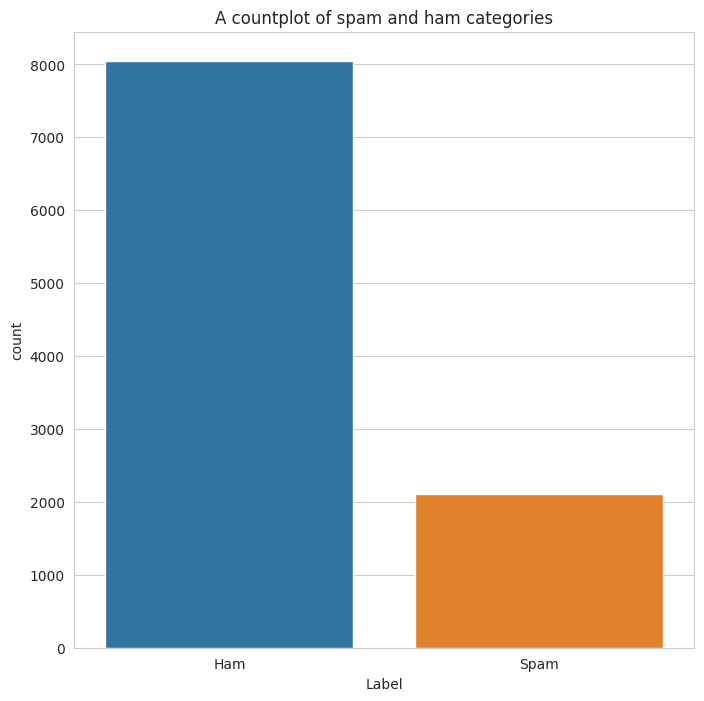

In [ ]:
#Visualizing Number of Spam Messages and Ham
plt.figure(figsize=(8,8))
sns.countplot(x = 'Label', data = email_df).set(title = 'A countplot of spam and ham categories')

## Preparing Data For the model

In [ ]:
# Separating data into dependent and independent variables
X = email_df['Mail']
y = email_df['Label']

In [ ]:
# Encoding the spam or ham to numerical forms
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y)

In [ ]:
# preprocessing the mails
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Baseline Modeling

### Support Vector Classifier

In [ ]:
# creating a list to store the scores of each model
scores = []

# Creating a function to collect the scores before appending to the score list
def model_scores(model_name, y_test, predictions):
  prec = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  acc = accuracy_score(y_test, predictions)
  # creating a dictionary that contains details of the model's scores
  return {
      'Model_name':model_name,
      'Precision': prec,
      'recall': recall,
      'Accuracy': acc,
      'f1_score': f1
  }

In [ ]:
# Using Support Vector Machine as the first Model
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

# making predictions
pred_svc = svc_clf.predict(X_test)

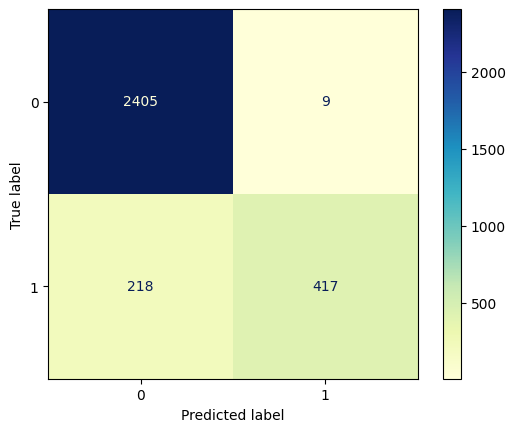

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      2414
           1       0.98      0.66      0.79       635

    accuracy                           0.93      3049
   macro avg       0.95      0.83      0.87      3049
weighted avg       0.93      0.93      0.92      3049



In [ ]:
# resetting the seaborn graphs
sns.reset_orig()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_svc, labels= svc_clf.classes_, cmap='YlGnBu')
plt.show()

print(classification_report(y_test, pred_svc))

In [ ]:
# Collecting scores and updating the score list
scores.append(model_scores('Support_vector_classifier', y_test, pred_svc))

### Naive Bayes

In [ ]:
#Using Naive bayes
bayes_clf = MultinomialNB()
bayes_clf.fit(X_train,y_train)

# making predictions
bayes_pred = bayes_clf.predict(X_test)

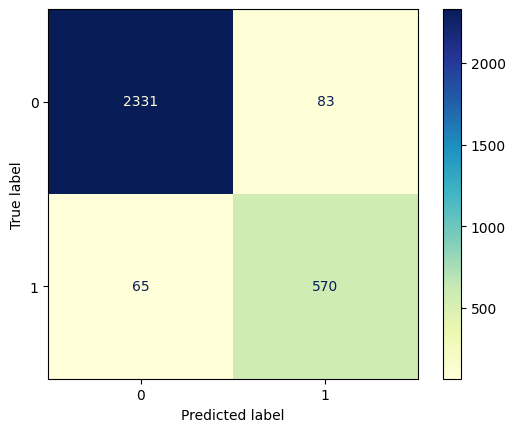

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2414
           1       0.87      0.90      0.89       635

    accuracy                           0.95      3049
   macro avg       0.92      0.93      0.93      3049
weighted avg       0.95      0.95      0.95      3049



In [ ]:
# Creating the confusion matrix
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, bayes_pred, cmap='YlGnBu', labels=bayes_clf.classes_)
plt.show()

# printing the Classification report
print(classification_report(y_test, bayes_pred))

In [ ]:
# appending scores to the list
scores.append(model_scores('Naive_bayes', y_test, bayes_pred))

### RandomForest Classifier

In [ ]:
#Using Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# making predictions
rfc_pred = rfc.predict(X_test)

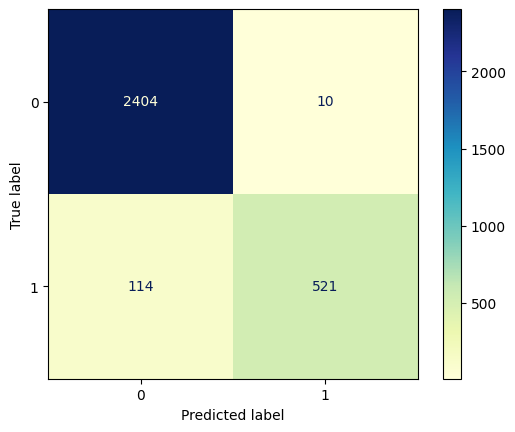

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2414
           1       0.98      0.82      0.89       635

    accuracy                           0.96      3049
   macro avg       0.97      0.91      0.93      3049
weighted avg       0.96      0.96      0.96      3049



In [ ]:
# Creating the confusion matrix
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, cmap='YlGnBu', labels=rfc.classes_)
plt.show()

# printing the Classification report
print(classification_report(y_test, rfc_pred))

In [ ]:
# Getting scores of the model and appending to the score list
scores.append(model_scores('Random_forest_classifier', y_test, rfc_pred))

### Logistic Regression

In [ ]:
lr = LogisticRegression()
#fitting the model
lr.fit(X_train, y_train)

#making predictions
lr_pred = lr.predict(X_test)

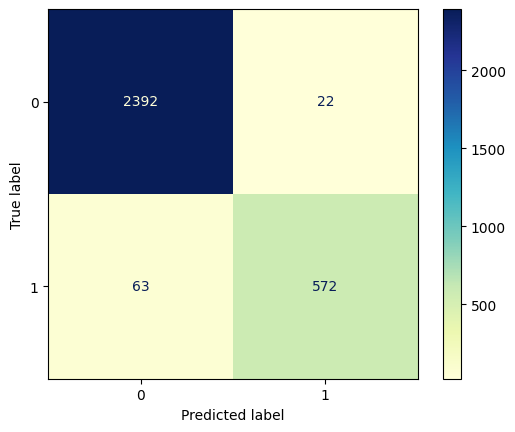

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2414
           1       0.96      0.90      0.93       635

    accuracy                           0.97      3049
   macro avg       0.97      0.95      0.96      3049
weighted avg       0.97      0.97      0.97      3049



In [ ]:
# creating a confusion matrix and classification report
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, cmap='YlGnBu')
plt.show()

# Printing the classification report
print(classification_report(y_test, lr_pred))

In [ ]:
# Appending scores to the list
scores.append(model_scores('Logistic_regression', y_test, lr_pred))

In [ ]:
# creating a dataframe from the score list
scores_df = pd.DataFrame(scores, columns=['Model_name', 'Precision', 'recall', 'Accuracy', 'f1_score'])
scores_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

,Model_name,Precision,recall,Accuracy,f1_score
0,Logistic_regression,0.962963,0.900787,0.972122,0.930838
1,Random_forest_classifier,0.981168,0.820472,0.959331,0.893654
2,Naive_bayes,0.872894,0.897638,0.951459,0.885093
3,Support_vector_classifier,0.978873,0.656693,0.925549,0.786051


After the building models with their default parameters, Logistic Regression, Random Forest and Naive bayes classifiers were the top three selected to be tuned and then the best model will be selected. This is as a result of the good results they gave after looking at their Accuracy, precicision, recall and their f1 scores respectively

# Cross Validation and Hyperparameters Tuning to select the best model

In [ ]:
# A list to hold the new scores
new_scores = []

# We will be using KFold for Cross Validation
cv = KFold(n_splits=5, shuffle=True)

# creating a list of models
models = [LogisticRegression(), RandomForestClassifier(), MultinomialNB()]

# Creating a Dictionary of Dictionaries for each model
parameters = {
    'Logistic_regression':{
        'penalty':['l1', 'l2', 'elasticnet'],
        'tol':np.arange(0.01,1,0.01),
        'C': np.arange(1,10,1)
    },
    'Random_forest':{
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_features':['sqrt', 'log2', None],
        'ccp_alpha':np.arange(0.01, 0.5, 0.01),
        'bootstrap':[True, False]
    },
    'MultinomialNB':{
        'alpha:np.arange(1,10,1)'
    }
}

=======================================Confusion matrix and Classification Report for LogisticRegression=============================================
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2414
           1       0.96      0.91      0.93       635

    accuracy                           0.97      3049
   macro avg       0.97      0.95      0.96      3049
weighted avg       0.97      0.97      0.97      3049



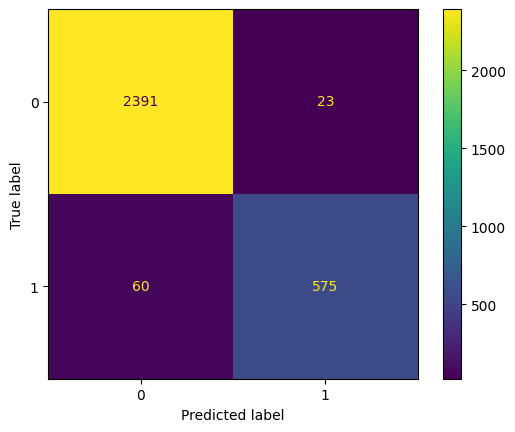

In [ ]:
# Creating a loop to iterate over the models and their parameters
for model, param in zip(models, parameters.values()):
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param, scoring='accuracy', cv=cv, random_state=0)
  random_search.fit(X_train, y_train)
  new_model = random_search.best_estimator_

  # fitting the new model
  new_model.fit(X_train, y_train)
  # making predictions
  pred = new_model.predict(X_test)

  # Appending model scores
  model_name = type(new_model).__name__
  new_scores.append(model_scores(model_name,  y_test, pred))

  # Print classification report and Confusion Matrix for each model
  print (f"=======================================Confusion matrix and Classification Report for {model_name}=============================================")
  print (classification_report(y_test, pred))
  sns.reset_orig()
  ConfusionMatrixDisplay.from_predictions(y_test, pred)
  plt.show()

## Using all the models to predict some message
### For the prediction, 0 represents not spam and 1 represents spam

In [ ]:
message = ["Hi Festus Anyan,Your UCC E-learning | University of Cape Coast account was just signed in to from a new device."
           "Your account: ps/itc/20/0058 festus.anyan@stu.ucc.edu.ghThursday, 13 July 2023, 2:18 AMDevice: Mozilla/5.0"
          "(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36IP: 154.160.22.180"
           "If this was you, then you don't need to do anything."
           "If you don't recognise this activity, please change your password."]
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

In [ ]:
model_2.predict(message)

In [ ]:
model_3.predict(message)

In [ ]:
model_4.predict(message)

In [ ]:
message = ["Hi Anyan Festus ,"
"We are excited to inform you that you can now get 8 Continuing Education Units (CEUs) by completing the Data Science and Machine Learning program from MIT IDSS."
"A CEU is a recognized measure used to determine the time spent in learning during professional development and training programs."
"Many employers, licensing agencies, and professional associations accept CEUs as evidence of a participant’s serious commitment to developing professional competence."
"So, don't wait any longer and begin your learning journey today!"
"For any follow-up questions about the CEUs or the program, please reply to this email or schedule a call with your program advisor from Great Learning."]

In [ ]:
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

In [ ]:
model_2.predict(message)

In [ ]:
model_3.predict(message)

In [ ]:
model_4.predict(message)

So given the first two messages, all models have been able to tell that the messages are not spam messages

### The message below was copied from my spam messages and fitted on all four models. Below are the predictions made by all models
1. Three models 1,3 and 4 predicted correctly by saying the message is spam and model two predicted that it is not spam

In [ ]:
message = ["Since you are on our Preferred Subscriber List, we are giving you an EXTRA discount not available to everyone else."
           "This is because you are a loyal subscriber (BIG THANK YOU!)"
            "So please read carefully below, and then make sure you type the code FOREVER at checkout for an additional discount."
           " Retail value: $397"
            "Your special price today: only $69"
            "Please use this coupon code: FOREVER"
            "This is our LOWEST.  PRICE.  EVER."
            "BAD NEWS: This private offer expires in a few hours."]
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

In [ ]:
model_2.predict(message)

In [ ]:
model_3.predict(message)

In [ ]:
model_4.predict(message)